In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
train = pd.read_csv('train.csv')

In [161]:
test = pd.read_csv('test.csv')

In [162]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [163]:
len(train.select_dtypes('object').columns)

43

In [164]:
len(train.select_dtypes('int64').columns)

35

In [165]:
len(train.select_dtypes('float').columns)

3

In [166]:
train.corr()['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

In [167]:
#saving the id columns for later

train_id =train['Id']
test_id =test['Id']

In [168]:
#dropping the id columns since it does not add any insights

train.drop('Id',axis=1,inplace=True)
test.drop('Id',axis=1,inplace=True)

In [169]:
column_names=train.select_dtypes('object').columns

In [170]:
total_categories = 0
unique_categories_list =[]
for column in column_names:
    print(f"{column} unique values are: {train[column].unique()} and number of unique values is {train[column].nunique()}\n")
    unique_categories_list.append(train[column].nunique())
    total_categories += train[column].nunique() -1

MSZoning unique values are: ['RL' 'RM' 'C (all)' 'FV' 'RH'] and number of unique values is 5

Street unique values are: ['Pave' 'Grvl'] and number of unique values is 2

Alley unique values are: [nan 'Grvl' 'Pave'] and number of unique values is 2

LotShape unique values are: ['Reg' 'IR1' 'IR2' 'IR3'] and number of unique values is 4

LandContour unique values are: ['Lvl' 'Bnk' 'Low' 'HLS'] and number of unique values is 4

Utilities unique values are: ['AllPub' 'NoSeWa'] and number of unique values is 2

LotConfig unique values are: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] and number of unique values is 5

LandSlope unique values are: ['Gtl' 'Mod' 'Sev'] and number of unique values is 3

Neighborhood unique values are: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] and number of unique va

In [171]:
total_categories

209

In [172]:
print(unique_categories_list)

[5, 2, 2, 4, 4, 2, 5, 3, 25, 9, 8, 5, 8, 6, 8, 15, 16, 4, 4, 5, 6, 4, 4, 4, 6, 6, 6, 5, 2, 5, 4, 7, 5, 6, 3, 5, 5, 3, 3, 4, 4, 9, 6]


In [173]:
#checking for duplicates in rows
print(f"Known houses: {len(train.index)} \n Unique houses: {len(train.drop_duplicates().index)}")

Known houses: 1460 
 Unique houses: 1460


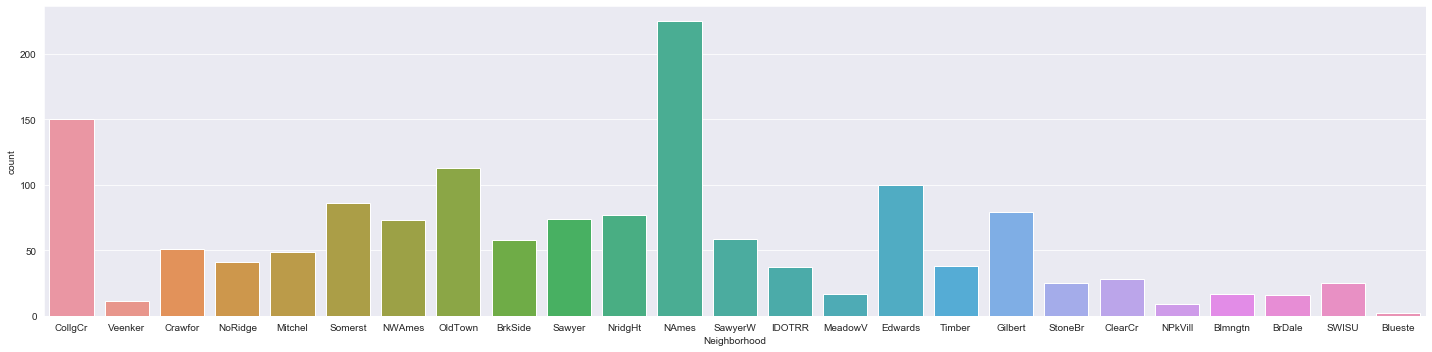

In [174]:
plt.figure(figsize=(20,5))
sns.countplot(data=train,x='Neighborhood')
plt.tight_layout()

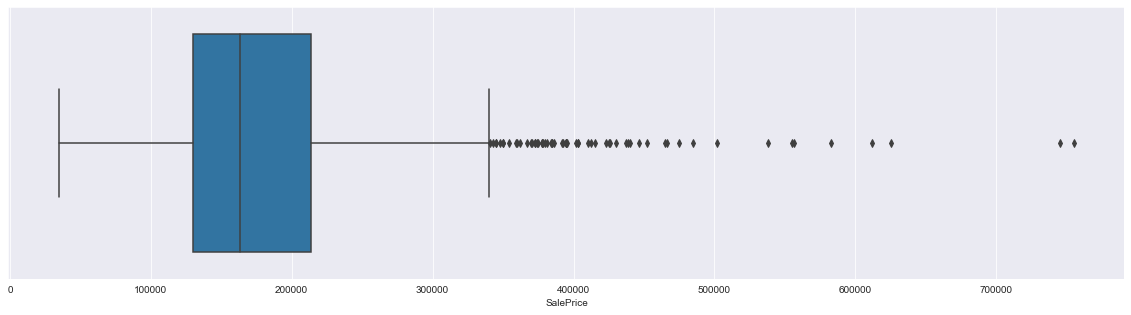

In [175]:
plt.figure(figsize=(20,5))
sns.boxplot(data=train,x='SalePrice')

In [176]:
Q1 = train['SalePrice'].quantile(0.25)
Q3 = train['SalePrice'].quantile(0.75)
iqr = Q3-Q1
maximum = Q3 + 1.5*iqr

In [177]:
maximum

340037.5

Percentage of houses over the maximum price

In [178]:
len(train[train['SalePrice']>maximum])/len(train)*100

4.178082191780822

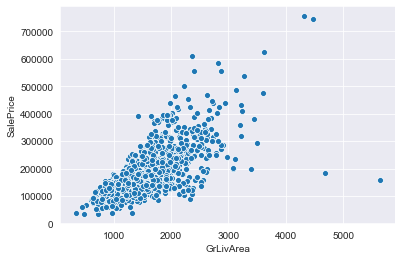

In [179]:
# there are two outliers in the plot below, let's drop them
sns.set_style('darkgrid')
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train)

In [180]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<200000)].index)

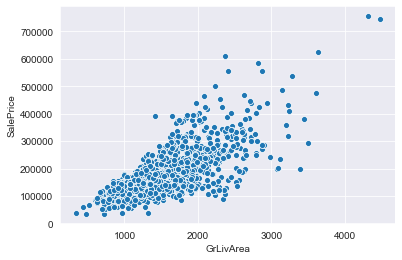

In [181]:
sns.set_style('darkgrid')
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train)

In [182]:
from scipy import stats
from scipy.stats import norm, skew

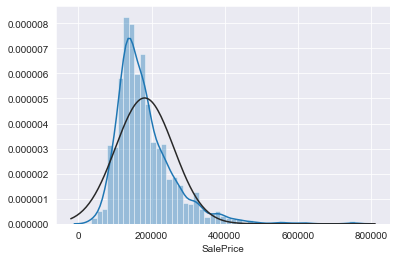

In [183]:
sns.distplot(train['SalePrice'],fit=norm)

In [184]:
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print(f"mu = {mu.round(2)} \nsigma = {sigma.round(2)}")

mu = 180932.92 
sigma = 79467.79


((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74213.25959976624, 180932.91906721535, 0.9320154492892367))

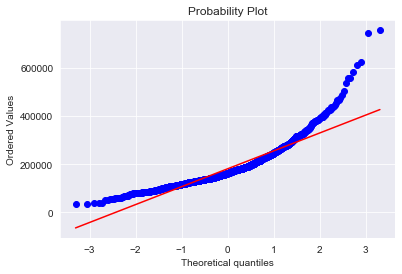

In [185]:
stats.probplot(train['SalePrice'],plot=plt)

The target variable is right skewed.  
As (linear) models love normally distributed data , we need to transform this variable and make it more normally distributed.

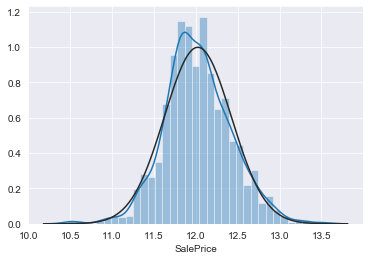

In [186]:
# Log-transformation of the target variable

train['SalePrice'] = np.log1p(train['SalePrice'])

sns.distplot(train['SalePrice'],fit=norm)

In [187]:
(mu, sigma) = norm.fit(train['SalePrice'])
print(f"mu = {mu.round(2)} \nsigma = {sigma.round(2)}")

mu = 12.02 
sigma = 0.4


((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([10.46027076, 10.47197813, 10.54273278, ..., 13.34550853,
         13.52114084, 13.53447435])),
 (0.3985294832980731, 12.024015155682548, 0.9953918721417083))

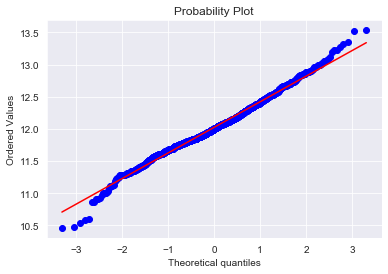

In [188]:
stats.probplot(train['SalePrice'],plot=plt)

The skew seems now corrected and the data appears more normally distributed.

**Now time to deal with Missing Values:**

Note: I am going to add the test data to the train data to handle the missing values. I am totally aware that it will cause some **data leakage** issue at the end. The better approach would be making a pipeline and use extracted features from train data and apply it to the test data!

In [189]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train['SalePrice'].values
all_data = pd.concat((train,test)).reset_index(drop=True)
all_data.drop(['SalePrice'],axis=1,inplace=True)
print(f'all_data size is: {all_data.shape}')

all_data size is: (2917, 79)


C:\Users\shaya\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [190]:
all_data_na=(all_data.isnull().sum()/len(all_data)*100).sort_values(ascending=False)

In [191]:
all_data_missing_ratio = pd.DataFrame({'Missing Ratio': all_data_na})

In [193]:
all_data_missing_ratio.head(25)

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageFinish,5.450806
GarageQual,5.450806
GarageYrBlt,5.450806
GarageCond,5.450806


In [194]:
all_data_missing_ratio.index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageFinish', 'GarageQual', 'GarageYrBlt', 'GarageCond', 'GarageType',
       'BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1',
       'MasVnrType', 'MasVnrArea', 'MSZoning', 'BsmtHalfBath', 'Utilities',
       'Functional', 'BsmtFullBath', 'Electrical', 'Exterior2nd',
       'KitchenQual', 'GarageCars', 'Exterior1st', 'GarageArea', 'TotalBsmtSF',
       'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1', 'SaleType', 'Condition2',
       'FullBath', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BldgType',
       'Fireplaces', 'Foundation', 'EnclosedPorch', 'CentralAir', 'Condition1',
       'ExterQual', 'ExterCond', 'YrSold', 'HalfBath', 'GrLivArea',
       'YearRemodAdd', 'YearBuilt', 'WoodDeckSF', 'TotRmsAbvGrd', 'Street',
       'ScreenPorch', 'SaleCondition', 'RoofStyle', 'RoofMatl', 'PoolArea',
       'PavedDrive', 'OverallQual', 'OverallCond', 'OpenPorchSF',
       'Neighborhood', 'MoS

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]),
 <a list of 79 Text xticklabel objects>)

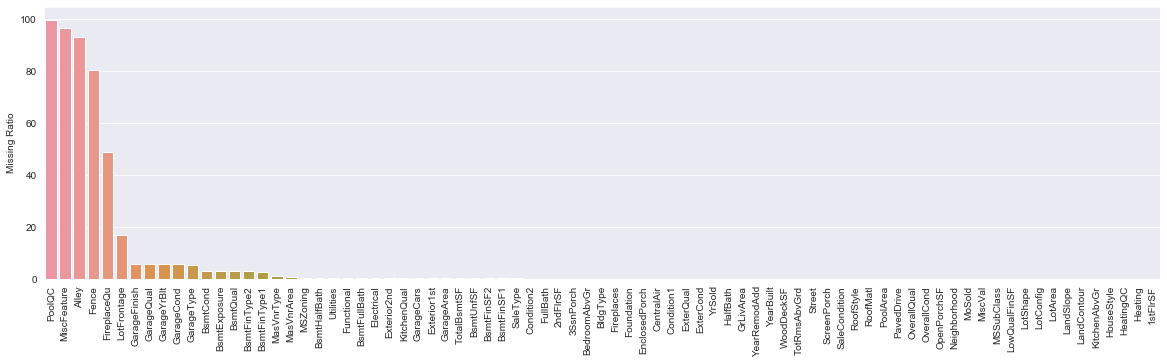

In [195]:
plt.figure(figsize=(20,5))
sns.barplot(x=all_data_missing_ratio.index, y=all_data_missing_ratio['Missing Ratio'])
plt.xticks(rotation='90')

**Imputing missing values:**

**PoolQC** : data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.  
**MiscFeature** : data description says NA means "no misc feature"  
**Alley** : data description says NA means "no alley access"  
**Fence** : data description says NA means "no fence"  
**FireplaceQu** : data description says NA means "no fireplace"  
**GarageType, GarageFinish, GarageQual and GarageCond** : Replacing missing data with None  
**MSSubClass** : Na most likely means No building class. We can replace missing values with None

In [215]:
all_data['PoolQC'] = all_data['PoolQC'].fillna('None')
all_data['MiscFeature'] = all_data['MiscFeature'].fillna('None')
all_data['Alley'] = all_data['Alley'].fillna('None')
all_data['Fence'] = all_data['Fence'].fillna('None')
all_data['FireplaceQu'] = all_data['FireplaceQu'].fillna('None')
all_data['GarageType'] = all_data['GarageType'].fillna('None')
all_data['GarageFinish'] = all_data['GarageFinish'].fillna('None')
all_data['GarageQual'] = all_data['GarageQual'].fillna('None')
all_data['GarageCond'] = all_data['GarageCond'].fillna('None')
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

**LotFrontage** : Since the area of each street is connected to the house property, most likely have a similar area to other houses in its neighborhood, we can fill in missing values by the median LotFrontage of the neighborhood.

In [197]:
# Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood

all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].apply(lambda x: x.fillna(x.median()))

**GarageYrBlt, GarageArea and GarageCars** : Replacing missing data with 0 (Since No garage = no cars in such garage.)

In [198]:
for col in ('GarageYrBlt','GarageArea','GarageCars'):
   all_data[col] = all_data[col].fillna(0)

**BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath** : missing values are likely zero for having no basement

In [199]:
for col in ('BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath'):
   all_data[col] = all_data[col].fillna(0)

**BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2** : For all these categorical basement-related features, NaN means that there is no basement.

In [200]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

**MasVnrArea and MasVnrType** : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.

In [201]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

**MSZoning (The general zoning classification)**: replacing the missing values with the mode

In [204]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

**Utilities** : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA.  
We can then safely remove it.

In [210]:
all_data.drop(['Utilities'], axis=1,inplace=True)

**Functional** : data description says NA means typical

In [211]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

**Electrical** : It has one NA value.

In [212]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

**KitchenQual**: Only one NA value, and same as Electrical.

In [213]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

**Exterior1st and Exterior2nd and SaleType**: fill the missing value with the most frequent (mode):

In [214]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [217]:
#Check remaining missing values if any 
all_data_na2 = (all_data.isnull().sum() / len(all_data)) * 100
all_data_missing_ratio2 = pd.DataFrame({'Missing Ratio': all_data_na2})
all_data_missing_ratio2.head()

,Missing Ratio
1stFlrSF,0.0
2ndFlrSF,0.0
3SsnPorch,0.0
Alley,0.0
BedroomAbvGr,0.0


Perfecto!!! No missing values.